In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing


In [2]:
data=pd.read_csv(r"C:\Users\tando\Downloads\Algerian_forest_fires_dataset_UPDATE (1).csv",header=1)

In [3]:
df=pd.DataFrame(data)

In [4]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [5]:
dfc=df

# Cleaning the data


In [6]:
ind=dfc[dfc["day"]=="Sidi-Bel Abbes Region Dataset"].index

In [7]:
ind

Int64Index([122], dtype='int64')

In [8]:
actual_index=ind[0]

In [9]:
actual_index

122

In [11]:
dfc.iloc[123]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Name: 123, dtype: object

In [12]:
dfc.iloc[123]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Name: 123, dtype: object

In [13]:
dfc=dfc.drop([122],axis=0)

In [14]:
dfc=dfc.drop([123],axis=0)

In [15]:
dfc.iloc[122]

day                     01
month                   06
year                  2012
Temperature             32
 RH                     71
 Ws                     12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
Name: 124, dtype: object

In [16]:
dfc["Region"]=0

In [17]:
dfc.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            236, 237, 238, 239, 240, 241, 242, 243, 244, 245],
           dtype='int64', length=244)

In [115]:
dfc.shape

(218, 14)

In [116]:
# Classifying region as 1 and 0

In [117]:
len(dfc.index)

218

In [119]:
for i in dfc.index:
    if i<(actual_index-1):
        dfc['Region'].iloc[i]=0
    elif i>actual_index:
        dfc['Region'].iloc[i]=1


C:\Users\tando\AppData\Local\Temp\ipykernel_12952\1343602451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['Region'].iloc[i]=0
C:\Users\tando\AppData\Local\Temp\ipykernel_12952\1343602451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['Region'].iloc[i]=1


IndexError: iloc cannot enlarge its target object

In [120]:
dfc["Region"].iloc[217]

1

In [121]:
dfc

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_Target
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,not fire
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,not fire
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,not fire
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,not fire
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,fire
242,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,not fire
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,not fire
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,not fire


In [122]:
dfc.iloc[165]

day                 29
month                7
Temperature         34
RH                  59
Ws                  16
Rain               0.0
FFMC              88.1
DMC               19.5
DC                47.2
ISI                7.4
BUI               19.5
FWI               10.9
Region               1
Classes_Target    fire
Name: 182, dtype: object

In [123]:
dfc.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Region', 'Classes_Target'],
      dtype='object')

In [124]:
dfc.columns=dfc.columns.str.strip()
dfc.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Region', 'Classes_Target'],
      dtype='object')

In [125]:
dfc.Classes=dfc.Classes.str.strip()
dfc.Classes.unique()

AttributeError: 'DataFrame' object has no attribute 'Classes'

In [126]:
dfc['DC'].iloc[165]=14.6

C:\Users\tando\AppData\Local\Temp\ipykernel_12952\2953325432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['DC'].iloc[165]=14.6


In [127]:
dfc['ISI'].iloc[165]=9

C:\Users\tando\AppData\Local\Temp\ipykernel_12952\3080214705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['ISI'].iloc[165]=9


In [128]:
dfc['BUI'].iloc[165]=12.5

C:\Users\tando\AppData\Local\Temp\ipykernel_12952\2676966524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['BUI'].iloc[165]=12.5


In [129]:
dfc['FWI'].iloc[165]=10.4

C:\Users\tando\AppData\Local\Temp\ipykernel_12952\669432078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['FWI'].iloc[165]=10.4


In [130]:
dfc['Classes'].iloc[165]="fire"

KeyError: 'Classes'

In [131]:
dfc.iloc[165]

day                 29
month                7
Temperature         34
RH                  59
Ws                  16
Rain               0.0
FFMC              88.1
DMC               19.5
DC                14.6
ISI                9.0
BUI               12.5
FWI               10.4
Region               1
Classes_Target    fire
Name: 182, dtype: object

In [132]:
dfc.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_Target
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,not fire
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,not fire
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,not fire
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,not fire
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0,fire


In [133]:
dfc.iloc[165]

day                 29
month                7
Temperature         34
RH                  59
Ws                  16
Rain               0.0
FFMC              88.1
DMC               19.5
DC                14.6
ISI                9.0
BUI               12.5
FWI               10.4
Region               1
Classes_Target    fire
Name: 182, dtype: object

In [134]:
dfc.isnull().sum()

day               0
month             0
Temperature       0
RH                0
Ws                0
Rain              0
FFMC              0
DMC               0
DC                0
ISI               0
BUI               0
FWI               0
Region            0
Classes_Target    0
dtype: int64

In [135]:
dfc.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Region', 'Classes_Target'],
      dtype='object')

In [136]:
# dfc.rename(columns={'Rain ':'Rain'},inplace=True)
# dfc.rename(columns={' RH':'RH'},inplace=True)
# dfc.rename(columns={' Ws':'Ws'},inplace=True)
# dfc.rename(columns={'Classes  ':'Classes'},inplace=True)

In [137]:
dfc.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Region', 'Classes_Target'],
      dtype='object')

In [138]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 245
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day             218 non-null    int64  
 1   month           218 non-null    int64  
 2   Temperature     218 non-null    int64  
 3   RH              218 non-null    int64  
 4   Ws              218 non-null    int64  
 5   Rain            218 non-null    float64
 6   FFMC            218 non-null    float64
 7   DMC             218 non-null    float64
 8   DC              218 non-null    float64
 9   ISI             218 non-null    float64
 10  BUI             218 non-null    float64
 11  FWI             218 non-null    float64
 12  Region          218 non-null    int64  
 13  Classes_Target  218 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 33.6+ KB


In [139]:
dfc.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_Target
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,not fire
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,not fire
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,not fire
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,not fire
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0,fire


In [142]:
dfc['day']=pd.to_numeric(dfc['day'])
dfc['month']=pd.to_numeric(dfc['month'])
# dfc=dfc.drop(['year'],axis=1)
dfc['Temperature']=pd.to_numeric(dfc['Temperature'])
dfc['RH']=pd.to_numeric(dfc['RH'])
dfc['Ws']=pd.to_numeric(dfc['Ws'])
dfc['Rain']=pd.to_numeric(dfc['Rain'])
dfc['FFMC']=pd.to_numeric(dfc['FFMC'])
dfc['DMC']=pd.to_numeric(dfc['DMC'])
dfc['DC']=pd.to_numeric(dfc['DC'])
dfc['ISI']=pd.to_numeric(dfc['ISI'])
dfc['BUI']=pd.to_numeric(dfc['BUI'])
dfc['FWI']=pd.to_numeric(dfc['FWI'])

In [143]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 245
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day             218 non-null    int64  
 1   month           218 non-null    int64  
 2   Temperature     218 non-null    int64  
 3   RH              218 non-null    int64  
 4   Ws              218 non-null    int64  
 5   Rain            218 non-null    float64
 6   FFMC            218 non-null    float64
 7   DMC             218 non-null    float64
 8   DC              218 non-null    float64
 9   ISI             218 non-null    float64
 10  BUI             218 non-null    float64
 11  FWI             218 non-null    float64
 12  Region          218 non-null    int64  
 13  Classes_Target  218 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 33.6+ KB


In [144]:
dfc.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_Target
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,not fire
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,not fire
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,not fire
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,not fire
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0,fire


In [145]:
dfc.Classes.unique()

AttributeError: 'DataFrame' object has no attribute 'Classes'

In [146]:
dfc.head()



,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_Target
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,not fire
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,not fire
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,not fire
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,not fire
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0,fire


In [147]:
dfc.tail()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_Target
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,fire
242,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,not fire
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,not fire
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,not fire
245,30,9,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,1,not fire


In [148]:
# Encoding classes column as 1 or 0

In [168]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Classes'. 
dfc ['Classes_Target']= label_encoder.fit_transform(dfc['Classes_Target']) 
dfc.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_Target
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0,0


In [169]:
dfc.tail()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_Target
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0
242,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1
245,30,9,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,1,1


In [170]:
# Fire---> 0
# Not Fire----> 1

<AxesSubplot:>

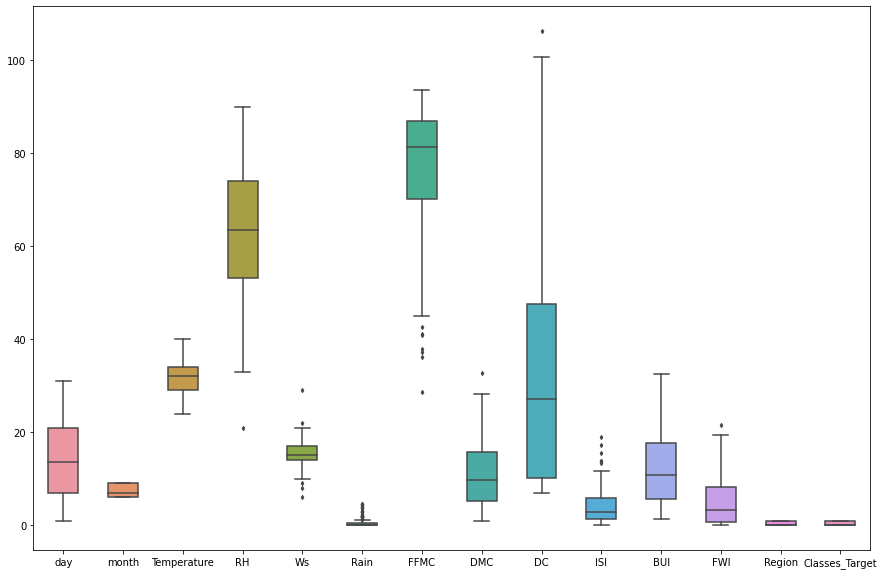

In [171]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dfc, width= 0.5,ax=ax,  fliersize=3)

In [172]:
q = dfc['Rain'].quantile(0.98)
# we are removing the top 2% data from the Rain column
dfc = dfc[dfc['Rain']<q]
q = dfc['FFMC'].quantile(0.99)
# we are removing the top 1% data from the FFMC column
dfc  = dfc[dfc['FFMC']<q]
q = dfc['DMC'].quantile(0.99)
# we are removing the top 1% data from the DMC column
dfc  = dfc[dfc['DMC']<q]
q = dfc['DC'].quantile(0.95)
# we are removing the top 5% data from the DC column
dfc  = dfc[dfc['DC']<q]
q = dfc['BUI'].quantile(0.99)
# we are removing the top 1% data from the BUI column
dfc  = dfc[dfc['BUI']<q]

<AxesSubplot:>

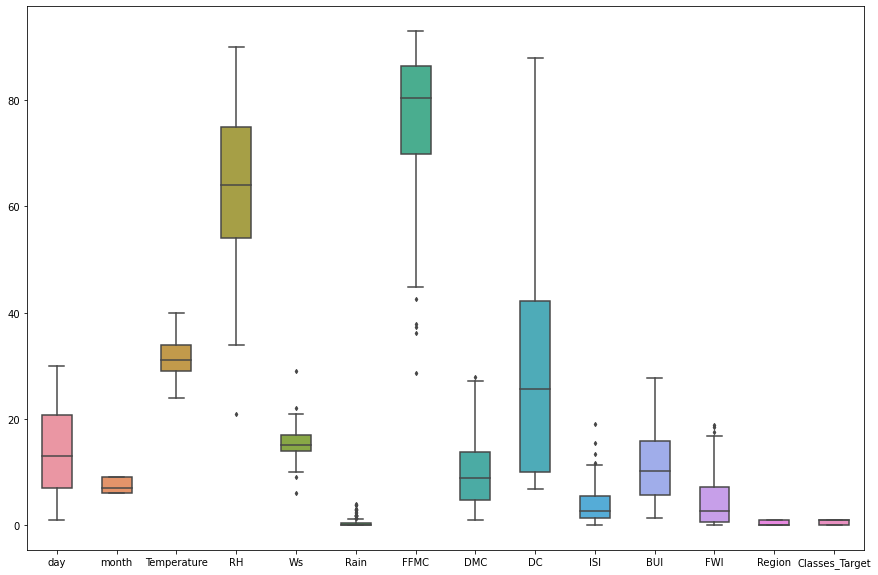

In [173]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dfc, width= 0.5,ax=ax,  fliersize=3)

In [174]:
from sklearn import preprocessing
from collections import Counter

In [175]:
print(sorted(Counter(dfc['Classes_Target']).items()))

[(0, 83), (1, 91)]


In [176]:
# 83 fire
# 91 not fire

In [177]:
# So our data is imbalanced

In [178]:
# Since the data is less we use oversampling

In [179]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [182]:
dfc['Classes_Target']

0      1
1      1
3      1
4      1
5      0
      ..
240    1
241    0
243    1
244    1
245    1
Name: Classes_Target, Length: 174, dtype: int32

In [186]:
X=dfc.iloc[:,:-1]

In [187]:
y=dfc.iloc[:,-1]

In [188]:
X

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,25,9,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,1
241,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
243,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
244,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [189]:
import imblearn
from imblearn import under_sampling, over_sampling

In [190]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_resampled,y_resampled=ros.fit_resample(X,y)

In [191]:
y_resampled.shape

(182,)

In [192]:
sorted(Counter(y_resampled).items())

[(0, 91), (1, 91)]

In [193]:
# Now we can see the data is balanced

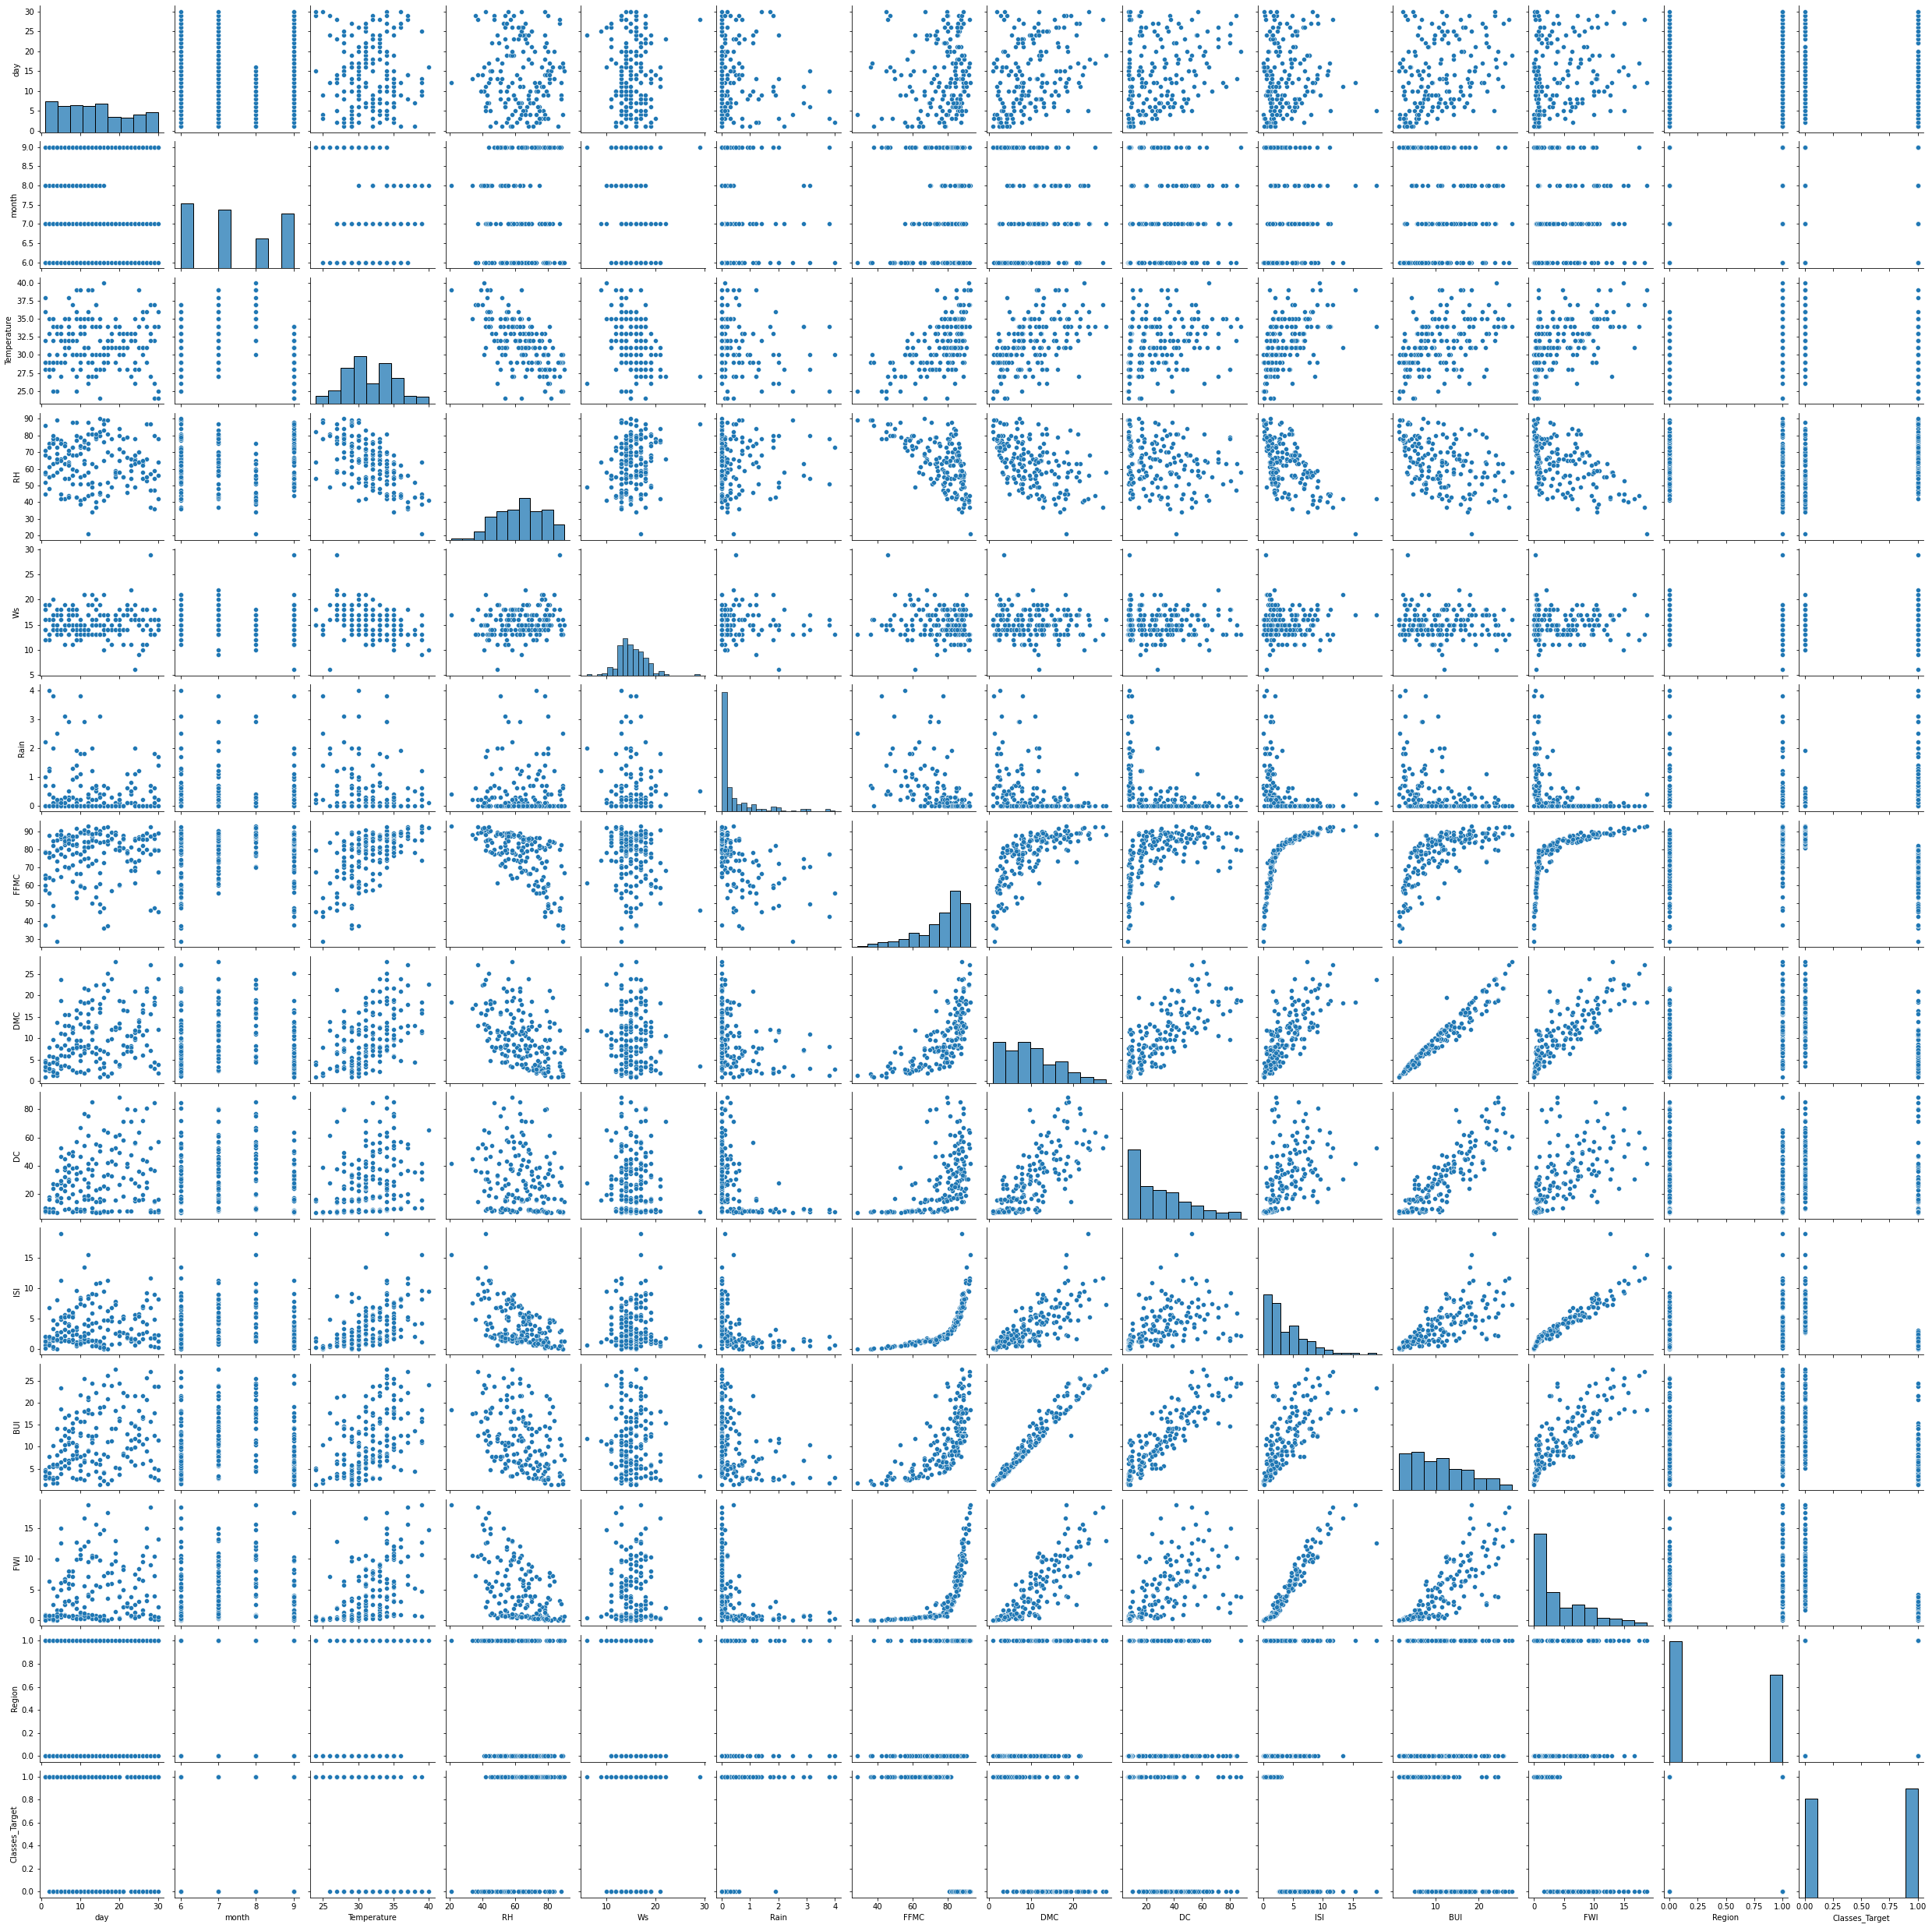

In [194]:
sns.pairplot(dfc)

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [196]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_resampled, y_resampled, test_size=0.33, random_state=42)

In [197]:
X_train

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
100,12,6,27,58,17,0.0,88.9,21.3,37.8,8.7,21.2,12.9,0
113,28,6,37,37,13,0.0,92.5,27.2,52.4,11.7,27.1,18.4,1
125,11,7,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,1
36,10,7,33,69,13,0.7,66.6,6.0,9.3,1.1,5.8,0.5,0
101,13,6,30,52,15,2.0,72.3,11.4,7.8,1.4,10.9,0.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,21,6,32,55,14,0.0,86.2,8.3,18.4,5.0,8.2,4.9,1
14,16,6,29,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,0
92,4,6,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
179,26,6,31,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,0


In [198]:
X_test

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
19,21,6,30,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,0
42,16,7,28,76,21,0.0,72.6,7.0,25.5,0.7,8.3,0.4,0
154,2,9,28,67,19,0.0,75.4,2.9,16.3,2.0,4.0,0.8,1
98,10,6,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0,0
146,9,8,39,43,12,0.0,91.7,16.5,30.9,9.6,16.4,12.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,9,29,86,16,0.0,37.9,0.9,8.2,0.1,1.4,0.0,1
109,24,6,35,68,16,0.0,85.3,10.0,17.0,4.9,9.9,5.3,1
148,12,8,39,21,17,0.4,93.0,18.4,41.5,15.5,18.4,18.8,1
26,29,6,32,47,13,0.3,79.9,18.4,84.4,2.2,23.8,3.9,0


In [199]:
y_train

100    0
113    0
125    1
36     1
101    1
      ..
106    0
14     1
92     1
179    0
102    1
Name: Classes_Target, Length: 121, dtype: int32

In [200]:
y_test

19     0
42     1
154    1
98     0
146    0
      ..
153    1
109    0
148    0
26     1
156    1
Name: Classes_Target, Length: 61, dtype: int32

In [201]:
# let's see how data is distributed for every column

C:\Users\tando\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tando\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tando\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

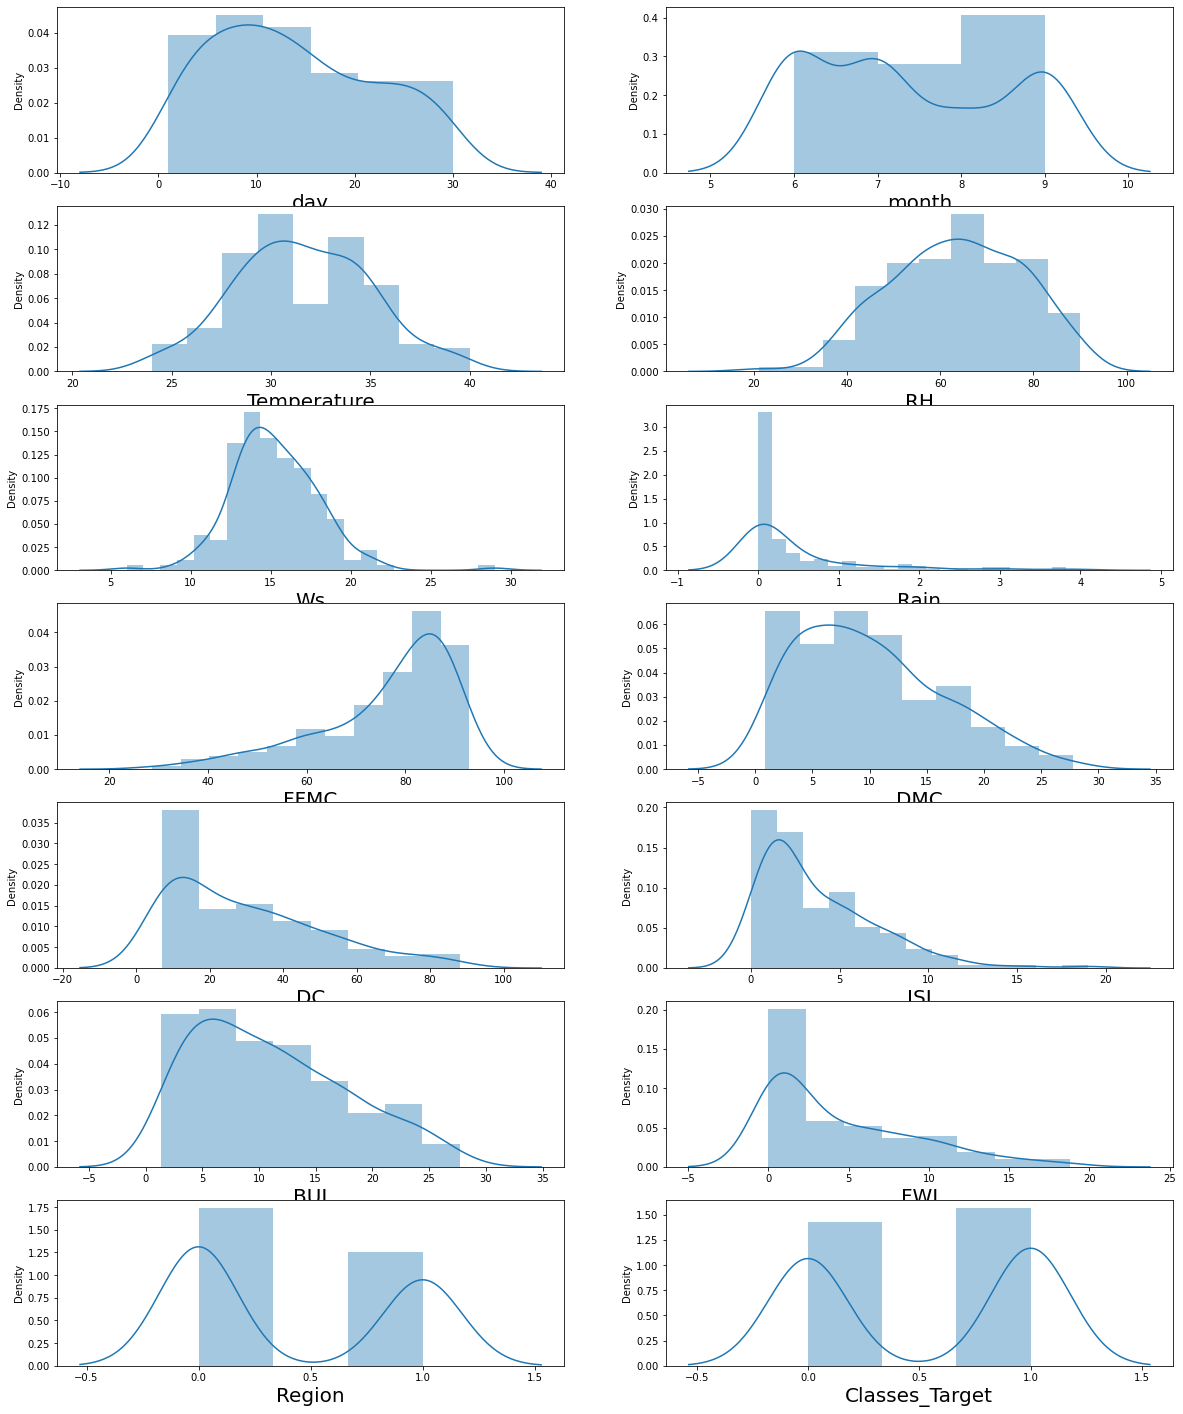

In [202]:
plt.figure(figsize=(20,25), facecolor='white')
num = 1

for column in dfc:
    if num<=14:     # as there are 14 columns in the data
        ax = plt.subplot(7,2,num)
        sns.distplot(dfc[column])
        plt.xlabel(column,fontsize=20)
    num+=1
plt.show()

In [203]:
dfc.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Region', 'Classes_Target'],
      dtype='object')

In [204]:
scaler = StandardScaler()

In [205]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_resampled, y_resampled, test_size=0.33, random_state=42)

In [206]:
X_train_after_Standardisation = scaler.fit_transform(X_train)
X_test_after_Standardisation = scaler.transform(X_test)

In [207]:
log_reg = LogisticRegression()

In [208]:
log_reg.fit(X_train_after_Standardisation,y_train)


LogisticRegression()

In [209]:
y_pred = log_reg.predict(X_test_after_Standardisation)

In [210]:
X_test

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
19,21,6,30,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,0
42,16,7,28,76,21,0.0,72.6,7.0,25.5,0.7,8.3,0.4,0
154,2,9,28,67,19,0.0,75.4,2.9,16.3,2.0,4.0,0.8,1
98,10,6,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0,0
146,9,8,39,43,12,0.0,91.7,16.5,30.9,9.6,16.4,12.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,9,29,86,16,0.0,37.9,0.9,8.2,0.1,1.4,0.0,1
109,24,6,35,68,16,0.0,85.3,10.0,17.0,4.9,9.9,5.3,1
148,12,8,39,21,17,0.4,93.0,18.4,41.5,15.5,18.4,18.8,1
26,29,6,32,47,13,0.3,79.9,18.4,84.4,2.2,23.8,3.9,0


In [211]:
accuracy_score(y_test,y_pred)

0.9344262295081968

In [212]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [213]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[25,  4],
       [ 0, 32]], dtype=int64)

In [214]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [215]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9344262295081968

In [216]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8620689655172413

In [217]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

In [218]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9259259259259259

In [219]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.pkl', 'wb') as f:
    pickle.dump(log_reg,f)
    


In [220]:
with open('modelForPrediction.pkl', 'rb') as f:
    pickle.load(f)